# Implementation of [[7,4,3]] Hamming code

In [5]:
import numpy as np
import galois
import matplotlib.pyplot as plt

In [6]:
GF2 = galois.GF(2)

# parity check matrix
H = np.array([
    [1, 0, 1, 0, 1, 0, 1], 
    [0, 1, 1, 0, 0, 1, 1], 
    [0, 0, 0, 1, 1, 1, 1],
])

H = GF2(H)

# generator matrix is null_space of H
G = H.null_space()
print(f'GH^T = {G @ H.T}')

GH^T = [[0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]]


In [7]:
# encoding a message into a codeword
m = np.array([1, 0, 0, 1])
m = GF2(m)
x = m @ G

print(f'codeword = {x}')
print(f'Hx^T = {H @ x.T}')

codeword = [1 0 0 1 1 0 0]
Hx^T = [0 0 0]


In [8]:
# flip a bit 
xp = x + GF2([0, 0, 0, 1, 0, 0, 0])

# extract syndrome
s = H @ xp.T
print(f'syndrome = {s}')

# decode syndrome
flipped_loc = np.where((H.T == s).all(axis=1))[0][0]
print(f"bit {flipped_loc} flipped")

# correct codeword
xp[flipped_loc] = GF2(1) - xp[flipped_loc]
remaining_error = np.linalg.norm(xp-x) 
print(f"remaining error = {remaining_error}")

syndrome = [0 0 1]
bit 3 flipped
remaining error = 0.0


In [9]:
# detection but no correction
xp = x + GF2([0, 0, 0, 1, 0, 0, 1])
s = H @ xp.T
print(f'syndrome = {s}')

# decode syndrome
flipped_loc = np.where((H.T == s).all(axis=1))[0][0]
print(f"bit {flipped_loc} flipped")

# correct codeword
xp[flipped_loc] = GF2(1) - xp[flipped_loc]
remaining_error = np.linalg.norm(xp-x) 
print(f"remaining error = {remaining_error}")

syndrome = [1 1 0]
bit 2 flipped
remaining error = 1.7320508075688772


In [10]:
# cannot even detect
xp = x + GF2([0, 0, 1, 1, 0, 0, 1])
s = H @ xp.T
print(f'syndrome = {s}')

remaining_error = np.linalg.norm(xp-x) 
print(f"remaining error = {remaining_error}")

syndrome = [0 0 0]
remaining error = 1.7320508075688772


In [11]:
# distance of code
d = min(sum(g) for g in np.array(G))
print(f'distance = {d}')

distance = 3


In [ ]:
def cycle(x, p): 
    err = GF2([1 if np.random.rand() < p else 0 for _ in range(7)])
    xp = x + err
    s = H @ xp.T

    flipped_loc = np.where((H.T == s).all(axis=1))[0]
    if len(flipped_loc) > 0:
        flipped_loc = flipped_loc[0]
        xp[flipped_loc] = GF2(1) - xp[flipped_loc]
    
    remaining_error = np.linalg.norm(xp-x) 
    return remaining_error != 0        

num_cycles = 1000
reps = 10
pp_opts = np.logspace(-3, -0.1, 20)

pl_means = []
pl_stds = []
for pp in pp_opts:
    pl_list = []
    for _ in range(reps):
        pl = sum([cycle(x, pp) for _ in range(num_cycles)])/num_cycles
        pl_list.append(pl)

    pl_means.append(np.mean(pl_list))
    pl_stds.append(np.std(pl_list))

threshold = 0.0 
for pp, pl in zip(pp_opts, pl_means):
    if pl > pp:
        threshold = pp
        break
print(f"threshold = {threshold}")

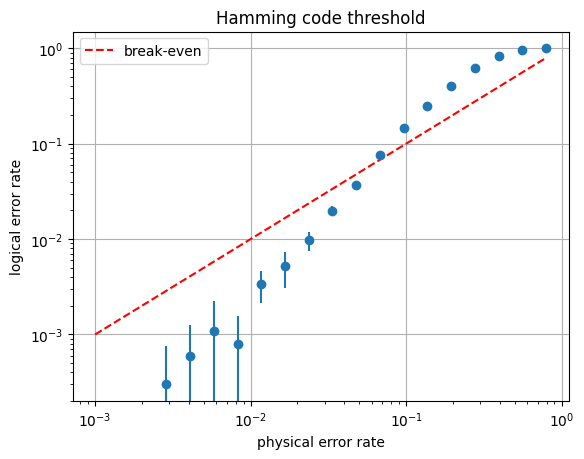

In [ ]:
plt.errorbar(pp_opts, pl_means, yerr=pl_stds, fmt='o')
plt.plot(pp_opts, pp_opts, 'r--', label='break-even')
plt.axvline(threshold, colors='k', linestyle='--', label='threshold: {:.2f}'.format(threshold))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('physical error rate')
plt.ylabel('logical error rate')
plt.legend()
plt.title('Hamming code threshold')
plt.grid()
plt.savefig('hamming_threshold.pdf', bbox_inches='tight')

threshold = 0.06785454573393576
